1. Downloading data from kaggle and reading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
chunksize = 10 ** 5
data = pd.DataFrame()
for chunk in pd.read_csv("train_data.csv", chunksize=chunksize):
    data = pd.concat([data, chunk])

In [ ]:
data.shape

(5531451, 190)

In [ ]:
train_labels=pd.read_csv("train_labels.csv")

In [ ]:
train_labels.shape

(458913, 2)

2.	The data might be too large, and you may get memory error while doing the project; so we will use only 20% of observations. Randomly choose 20% of observations from the “train_labels.csv”. Merge this sample with “train_data.csv” to have features for these applicants.

In [ ]:
train_labels_sample=train_labels.sample(frac=0.2,random_state=42)
train_labels_sample.head()

,customer_ID,target
33412,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0
350485,c34b0cf3175108892e42e9382e8177847ac15636870604...,1
36829,14aff3c0e0ed2aaaef6deb127f2541b67fdd0002615bfd...,0
444951,f82be644eb90ab65d737b6dfc5de670559fa2ca23c98ea...,0
17537,09dec6d53f0f12db6edcaecbb4d2bddf41f220ba9569d1...,0


In [ ]:
train_merged=pd.merge(train_labels_sample,data,how='inner',on='customer_ID')
train_merged.shape

(1107082, 191)

In [ ]:
train_merged.to_csv('train_sampled.csv', index=False)

3. Explore the data. Data Size, data type of features, a snapshot of data, …

In [ ]:
# Load the development sample data
data = pd.read_csv('train_sampled.csv')

# Print the shape of the data
print("Data shape:", data.shape)

# Check data types of features
print(f"Data Types:\n{data.dtypes}")

# First 5 rows of the data
print("Data snapshot:\n", data.head())

Data shape: (1107082, 191)
Data Types:
customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object
Data snapshot:
                                          customer_ID  target         S_2  \
0  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-03-21   
1  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-04-21   
2  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-05-08   
3  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-06-14   
4  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-07-26   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.628534  0.004250  0.017667  0.815468  0.005736  0.265531  0.005933  ...   
1  0.669914  0.418321  0.354284  1.000587  0.009

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with your dataset
# Calculate the count of columns for each category
categories_count = data.columns.str[0].value_counts()

# Filter column names starting with S_, P_, B_, etc.
filtered_columns = data.columns[data.columns.str.startswith(('S_', 'P_', 'B_', 'R_', 'D_'))]

# Calculate the count of columns for each filtered category
filtered_categories_count = filtered_columns.str[0].value_counts()

# Create a DataFrame with all categories and their counts
final_table = pd.DataFrame({
    'Category': ['S', 'P', 'B', 'R', 'D'],
    '# of Features': [
        filtered_categories_count.get('S', 0),
        filtered_categories_count.get('P', 0),
        filtered_categories_count.get('B', 0),
        filtered_categories_count.get('R', 0),
        filtered_categories_count.get('D', 0)
    ]
})

# Sort the table in descending order based on the number of features
final_table_sorted = final_table.sort_values(by='# of Features', ascending=False)

# Reset the index to remove the existing index column
final_table_sorted.reset_index(drop=True, inplace=True)

# Apply colors to the table
final_table_styled = final_table_sorted.style.apply(lambda x: ['background: lightblue' if x.name % 2 == 0 else '' for i in x], axis=1)

# Print the styled table
final_table_styled


,Category,# of Features
0,D,96
1,B,40
2,R,28
3,S,22
4,P,3


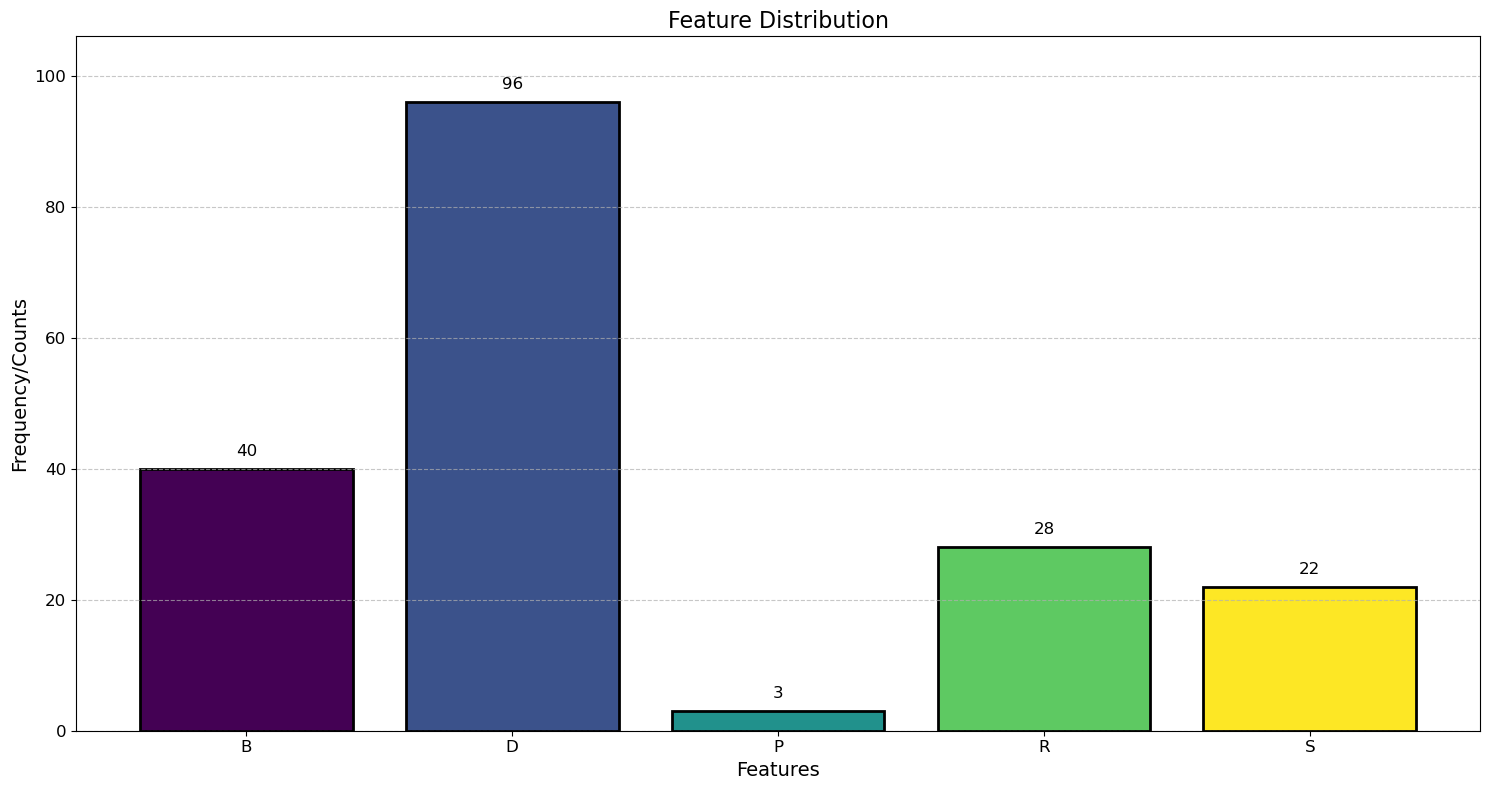

In [ ]:
categories = ['B', 'D', 'P', 'R', 'S']
cat_count_values = [40, 96, 3, 28, 22]
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
plt.figure(figsize=(15, 8))
plt.bar(categories, cat_count_values, color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Frequency/Counts', fontsize=14)
plt.title('Feature Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(cat_count_values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(cat_count_values) + 10)
plt.tight_layout()
plt.show()

In [ ]:
data['S_2'] = pd.to_datetime(data['S_2'])

In [ ]:
data['Month_Year'] = pd.to_datetime(data['S_2']).dt.to_period('M')

# Count unique month-years per customer
customer_month_counts = data.groupby('customer_ID')['Month_Year'].nunique().reset_index(name='Category')

# Count number of customers per category
customer_count_by_months = customer_month_counts.groupby('Category').size().reset_index(name='# of Observations')

# Calculate average target rate per customer
avg_target_by_customer = data.groupby('customer_ID')['target'].mean().reset_index(name='Default Rate')

# Merge customer month counts with average target rate
merged_data = pd.merge(customer_month_counts, avg_target_by_customer, on='customer_ID')

# Calculate average target rate per category
avg_target_by_months = merged_data.groupby('Category')['Default Rate'].mean().reset_index(name='Default Rate')

# Sort customer_count_by_months by 'Category' in descending order
customer_count_by_months = customer_count_by_months.sort_values(by='Category', ascending=False)

# Merge avg_target_by_months with customer_count_by_months
output = pd.merge(customer_count_by_months,avg_target_by_months, on='Category')

# Remove the 'Month_Year' column
data.pop('Month_Year')

print("Output:")
print(output)


Output:
    Category  # of Observations  Default Rate
0         13              77348      0.229405
1         12               2115      0.378723
2         11               1159      0.440897
3         10               1329      0.465764
4          9               1278      0.435837
5          8               1169      0.450813
6          7               1046      0.414914
7          6               1109      0.412985
8          5                933      0.394427
9          4                938      0.430704
10         3               1158      0.357513
11         2               1217      0.312243
12         1                984      0.331301


In [ ]:
# Step 1: Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values Count: \n", missing_values)

# Step 2: Checking for duplicates
duplicates = data.duplicated().sum()
print("Duplicates Count: ", duplicates)

# If there are duplicates, you can drop them
if duplicates > 0:
    data = data.drop_duplicates()

# Step 3: Convert data types
# Convert 'S_2' column to datetime
data['S_2'] = pd.to_datetime(data['S_2'])

# Snapshot of data after cleaning
print("Snapshot:\n", data['S_2'].head())


Missing Values Count: 
 customer_ID         0
target              0
S_2                 0
P_2              9129
D_39                0
                ...  
D_141           20041
D_142          918619
D_143           20041
D_144            8126
D_145           20041
Length: 191, dtype: int64
Duplicates Count:  0
Snapshot:
 0   2017-03-21
1   2017-04-21
2   2017-05-08
3   2017-06-14
4   2017-07-26
Name: S_2, dtype: datetime64[ns]


In [ ]:
# Calculate missing data percentage in each column
missing_percentage = data.isnull().sum() * 100 / len(data)
print("Missing Percentage: \n", missing_percentage)

Missing Percentage: 
 customer_ID     0.000000
target          0.000000
S_2             0.000000
P_2             0.824600
D_39            0.000000
                 ...    
D_141           1.810254
D_142          82.976600
D_143           1.810254
D_144           0.734002
D_145           1.810254
Length: 191, dtype: float64


In [ ]:
# Function to identify binary features
def find_binary_features(data):
    binary_features = []
    for column in data.columns:
        unique_values = data[column].unique()
        if (len(unique_values) == 2):
            binary_features.append(column)
    return binary_features

# Find binary features in the DataFrame
binary_features = find_binary_features(data)

print("Binary features found:", binary_features)

Binary features found: ['target', 'D_87', 'B_31']


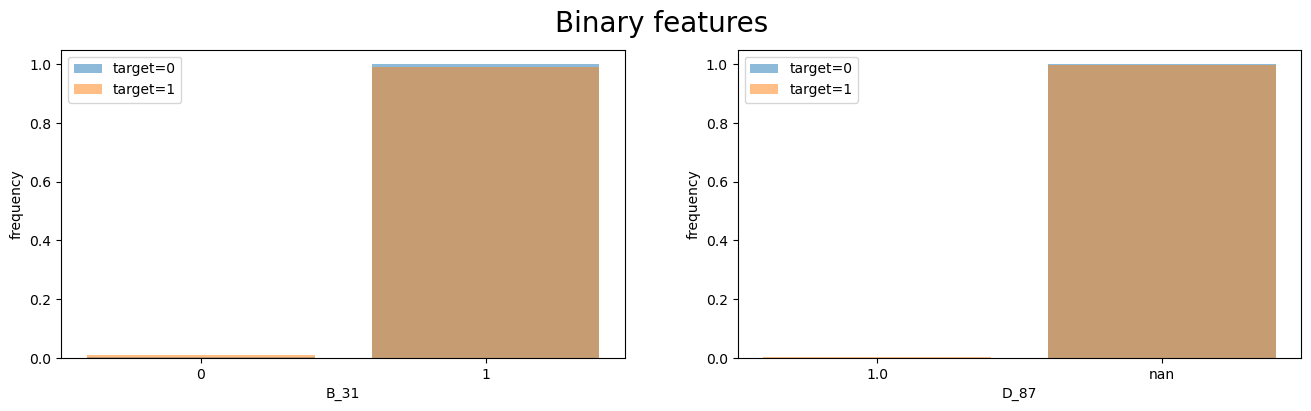

In [ ]:
bin_features = ['B_31', 'D_87']
plt.figure(figsize=(16, 4))
for i, f in enumerate(bin_features):
    plt.subplot(1, 2, i+1)
    temp = pd.DataFrame(data[f][data.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(data[f][data.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Binary features', fontsize=20)
plt.show()
del temp

In [ ]:
binary_columns=['B_31','D_87']
for column in binary_columns:
    data[column] = data[column].fillna(0)

categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

for column in data.select_dtypes(include=[np.number]).columns:
    data[column] = data[column].fillna(data[column].mean())

In [ ]:
# Calculate missing data percentage in each column
missing_percentage = data.isnull().sum() * 100 / len(data)
print("Missing Percentage: \n", missing_percentage)

Missing Percentage: 
 customer_ID    0.0
target         0.0
S_2            0.0
P_2            0.0
D_39           0.0
              ... 
D_141          0.0
D_142          0.0
D_143          0.0
D_144          0.0
D_145          0.0
Length: 191, dtype: float64


In [ ]:
data['S_2'] = pd.to_datetime(data['S_2'])

In [ ]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
encoded_data = pd.get_dummies(data, columns=columns_to_encode, prefix=columns_to_encode)

In [ ]:
new_columns = [col for col in encoded_data.columns if col not in data.columns]

print(new_columns)

['B_30_0.0', 'B_30_1.0', 'B_30_2.0', 'B_38_1.0', 'B_38_2.0', 'B_38_3.0', 'B_38_4.0', 'B_38_5.0', 'B_38_6.0', 'B_38_7.0', 'D_114_0.0', 'D_114_1.0', 'D_116_0.0', 'D_116_1.0', 'D_117_-1.0', 'D_117_1.0', 'D_117_2.0', 'D_117_3.0', 'D_117_4.0', 'D_117_5.0', 'D_117_6.0', 'D_120_0.0', 'D_120_1.0', 'D_126_-1.0', 'D_126_0.0', 'D_126_1.0', 'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ', 'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0', 'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0']


In [ ]:
encoded_data.to_csv('encoded_data.csv', index=False)

In [ ]:
# Read data
df = pd.read_csv('encoded_data.csv')
df.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,False,False,True,False,False,False,False,False,False,True
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,False,False,True,False,False,False,False,False,False,True
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,False,False,True,False,False,True,False,False,False,False
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,False,False,True,False,False,True,False,False,False,False
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
new_columns = [col for col in df.columns if col.startswith(tuple(categorical_columns))]

print(new_columns)
len(new_columns)

['B_30_0.0', 'B_30_1.0', 'B_30_2.0', 'B_38_1.0', 'B_38_2.0', 'B_38_3.0', 'B_38_4.0', 'B_38_5.0', 'B_38_6.0', 'B_38_7.0', 'D_114_0.0', 'D_114_1.0', 'D_116_0.0', 'D_116_1.0', 'D_117_-1.0', 'D_117_1.0', 'D_117_2.0', 'D_117_3.0', 'D_117_4.0', 'D_117_5.0', 'D_117_6.0', 'D_120_0.0', 'D_120_1.0', 'D_126_-1.0', 'D_126_0.0', 'D_126_1.0', 'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ', 'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0', 'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0']


45

4.	Perform One-Hot encoding on categorical variables.

In [ ]:
df.shape
print(df.columns)
df.head()

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=225)


,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,False,False,True,False,False,False,False,False,False,True
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,False,False,True,False,False,False,False,False,False,True
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,False,False,True,False,False,True,False,False,False,False
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,False,False,True,False,False,True,False,False,False,False
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
import pandas as pd
last_12_months = data['S_2'] >= data['S_2'].max() - pd.DateOffset(months=12)
features = df.drop([ 'S_2' ], axis=1).columns.to_list()
cat_col = [i for i in features if i.startswith('B_30')or i.startswith('B_38') or i.startswith('D_114') or i.startswith('D_116')or i.startswith('D_117') or i.startswith('D_120') or i.startswith('D_126') or i.startswith('D_63')or i.startswith('D_64')or i.startswith('D_66') or i.startswith('D_68')]
ind_col = ['customer_ID', 'target']
num_col = [col for col in features if col not in cat_col and col not in ind_col]
df_num_agg = df[last_12_months].groupby('customer_ID')[num_col].agg(['mean', 'min', 'max', 'last'])
df_num_agg.columns = ['_'.join(x) for x in df_num_agg.columns]
print(df_num_agg)
print(df_num_agg.shape)
df = pd.merge(df, df_num_agg, on='customer_ID')
print(df.shape)


                                                    P_2_mean   P_2_min  \
customer_ID                                                              
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f523...  0.450440  0.328983   
000445609ff2a39d2dd02484899affa5696210a95f6869f...  0.970502  0.949051   
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff...  0.661224  0.628740   
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab7040...  0.970656  0.963991   
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470f...  0.955365  0.918010   
...                                                      ...       ...   
fffe2bc02423407e33a607660caeed076d713d8a5ad3232...  0.513501  0.405106   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...  0.859008  0.831279   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...  0.786264  0.756983   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...  0.800077  0.754129   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...  0.982330  0.965709   

                                     

In [ ]:
# Save the DataFrame to CSV
df.to_csv("final_data_for_project.csv", index=False)

In [ ]:
# Read data
chunksize = 10 ** 5

df1 = pd.DataFrame()
for chunk in pd.read_csv("final_data_for_project.csv", chunksize=chunksize):
    df1 = pd.concat([df1, chunk])

In [ ]:
df1['S_2'] = pd.to_datetime(df1['S_2'])

count_D_1 = df1.columns[df1.columns.str.contains('D')]
count_S_1 = df1.columns[df1.columns.str.contains('S')]
count_P_1 = df1.columns[df1.columns.str.contains('P')]
count_B_1 = df1.columns[df1.columns.str.contains('B')]
count_R_1 = df1.columns[df1.columns.str.contains('R')]

print("Delinquency :", count_D_1.shape[0])
print("Spend:", count_S_1.shape[0])
print("Payment:", count_P_1.shape[0])
print("Balance:", count_B_1.shape[0])
print("Risk:", count_R_1.shape[0])

Delinquency : 471
Spend: 106
Payment: 15
Balance: 200
Risk: 142


6.	Split data into 70% as Train sample, 15% as Test1, and 15% as Test2.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your data in a DataFrame called 'data'
# with the target variable 'target' and features 'X'
X = df1.drop(columns=['customer_ID','target','S_2'] )
Y = df1['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test_1, X_test_2, Y_test_1, Y_test_2 = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [ ]:
# check

print (X_train.shape)
print (Y_train.shape)
print (X_test_1.shape)
print (Y_test_1.shape)
print (X_test_2.shape)
print (Y_test_2.shape)

(774957, 930)
(774957,)
(166062, 930)
(166062,)
(166063, 930)
(166063,)


In [ ]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# for this step, we don't play with parameters of RF, and just use the
model_for_feature_reduction_default = XGBClassifier(use_label_encoder=False)
model_for_feature_reduction_default.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Feature_Importance_default = pd.DataFrame(columns = ["Feature", "Feature_Importance"])
Feature_Importance_default.Feature = X_train.columns
Feature_Importance_default.Feature_Importance = model_for_feature_reduction_default.feature_importances_
Feature_Importance_default.sort_values(by=["Feature_Importance"], inplace=True, ascending=False)
Feature_Importance_default
Feature_Importance_default.to_csv("Feature_Importance_default.csv", index=False)

# Make predictions on test1 and test2 datasets
predictions_test1 = model_for_feature_reduction_default.predict(X_test_1)
predictions_test2 = model_for_feature_reduction_default.predict(X_test_2)

# Calculate accuracy scores
accuracy_test1 = accuracy_score(Y_test_1, predictions_test1)
accuracy_test2 = accuracy_score(Y_test_2, predictions_test2)

print("Accuracy on test1 data:", accuracy_test1)
print("Accuracy on test2 data:", accuracy_test2)

Accuracy on test1 data: 0.9323204586238875
Accuracy on test2 data: 0.9322305390123026


In [ ]:
Feature_Importance_default=pd.read_csv("Feature_Importance_default.csv")
Feature_Importance_default

,Feature,Feature_Importance
0,P_2_last,0.508684
1,B_1_last,0.082549
2,B_2_last,0.041315
3,D_44_max,0.027100
4,R_1_last,0.026684
5,D_41_last,0.025054
6,B_4_last,0.023625
7,B_9_last,0.023262
8,S_3_mean,0.023112
9,D_45_max,0.022618


In [ ]:
xgb_model_for_feature_reduction_custom = XGBClassifier(
    n_estimators=300,  # Number of trees
    learning_rate=0.5,  # Learning rate
    max_depth=4,  # Maximum depth of trees
    subsample=0.5,  # Use 50% of observations to build each tree
    colsample_bytree=0.5,  # Use 50% of features to build each tree
    use_label_encoder=False,
    scale_pos_weight=5 )

xgb_model_for_feature_reduction_custom.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Feature_Importance_custom = pd.DataFrame(columns = ["Feature", "Feature_Importance"])
Feature_Importance_custom.Feature = X_train.columns
Feature_Importance_custom.Feature_Importance = xgb_model_for_feature_reduction_custom.feature_importances_
Feature_Importance_custom.sort_values(by=["Feature_Importance"], inplace=True, ascending=False)
Feature_Importance_custom

Feature_Importance_custom.to_csv("Feature_Importance_custom.csv",index=False)
# Make predictions on test1 and test2 datasets
predictions_test1_custom = xgb_model_for_feature_reduction_custom.predict(X_test_1)
predictions_test2_custom = xgb_model_for_feature_reduction_custom.predict(X_test_2)

# Calculate accuracy scores
accuracy_test1_custom = accuracy_score(Y_test_1, predictions_test1_custom)
accuracy_test2_custom = accuracy_score(Y_test_2, predictions_test2_custom)

print("Accuracy on test1 data with given parameters:", accuracy_test1_custom)
print("Accuracy on test2 data with given parameters:", accuracy_test1_custom)

Accuracy on test1 data with given parameters: 0.9581300959882454
Accuracy on test2 data with given parameters: 0.9581300959882454


In [ ]:
Feature_Importance_custom=pd.read_csv("Feature_Importance_custom.csv")
Feature_Importance_custom

,Feature,Feature_Importance
0,P_2_last,0.129473
1,B_2_last,0.039144
2,B_18_last,0.023955
3,B_1_last,0.019360
4,B_2_mean,0.011691
...,...,...
925,B_28,0.000000
926,R_12,0.000000
927,S_17,0.000000
928,D_82,0.000000


In [ ]:
selected_features_default = Feature_Importance_default[Feature_Importance_default.Feature_Importance >0.005]
selected_features_default

,Feature,Feature_Importance
0,P_2_last,0.508684
1,B_1_last,0.082549
2,B_2_last,0.041315
3,D_44_max,0.027100
4,R_1_last,0.026684
5,D_41_last,0.025054
6,B_4_last,0.023625
7,B_9_last,0.023262
8,S_3_mean,0.023112
9,D_45_max,0.022618


In [ ]:
selected_features_custom = Feature_Importance_custom[Feature_Importance_custom.Feature_Importance >0.005]
selected_features_custom

,Feature,Feature_Importance
0,P_2_last,0.129473
1,B_2_last,0.039144
2,B_18_last,0.023955
3,B_1_last,0.019360
4,B_2_mean,0.011691
5,D_48_last,0.010343
6,D_45_max,0.009043
7,R_1_mean,0.008599
8,S_3_mean,0.008030
9,B_9_last,0.007328


In [ ]:
features_selected = pd.concat([selected_features_default, selected_features_custom], axis=0).drop_duplicates(subset='Feature')
features_selected.reset_index(drop=True, inplace=True)

# Sort values by 'Feature_Importance' column
features_selected = features_selected.sort_values(by='Feature_Importance', ascending=False)



In [ ]:
features_selected

,Feature,Feature_Importance
0,P_2_last,0.508684
1,B_1_last,0.082549
2,B_2_last,0.041315
3,D_44_max,0.027100
4,R_1_last,0.026684
5,D_41_last,0.025054
6,B_4_last,0.023625
7,B_9_last,0.023262
8,S_3_mean,0.023112
9,D_45_max,0.022618


In [ ]:
features_selected.to_csv('features_selected.csv',index=False)

In [ ]:
features_selected=pd.read_csv("features_selected.csv")
features_selected_final=features_selected.Feature
features_selected_final
features_array = features_selected_final.values
features_array

array(['P_2_last', 'B_1_last', 'B_18_last', 'B_2_last', 'B_2_mean',
       'D_48_last', 'D_45_max', 'D_44_max', 'R_1_last', 'B_9_last',
       'B_23_last', 'R_2_last', 'D_42_max', 'S_3_mean', 'B_4_last',
       'D_45_mean', 'R_1_mean', 'D_41_last', 'D_45_last', 'B_10_min',
       'S_3_last'], dtype=object)

In [ ]:
X_train=X_train[features_array]
X_test_1=X_test_1[features_array]
X_test_2=X_test_2[features_array]

In [ ]:
count_D_1 = X_train.columns[X_train.columns.str.contains('D')]
count_S_1 = X_train.columns[X_train.columns.str.contains('S')]
count_P_1 = X_train.columns[X_train.columns.str.contains('P')]
count_B_1 = X_train.columns[X_train.columns.str.contains('B')]
count_R_1 = X_train.columns[X_train.columns.str.contains('R')]

print("Delinquency :", count_D_1.shape[0])
print("Spend:", count_S_1.shape[0])
print("Payment:", count_P_1.shape[0])
print("Balance:", count_B_1.shape[0])
print("Risk:", count_R_1.shape[0])

Delinquency : 7
Spend: 2
Payment: 1
Balance: 8
Risk: 3


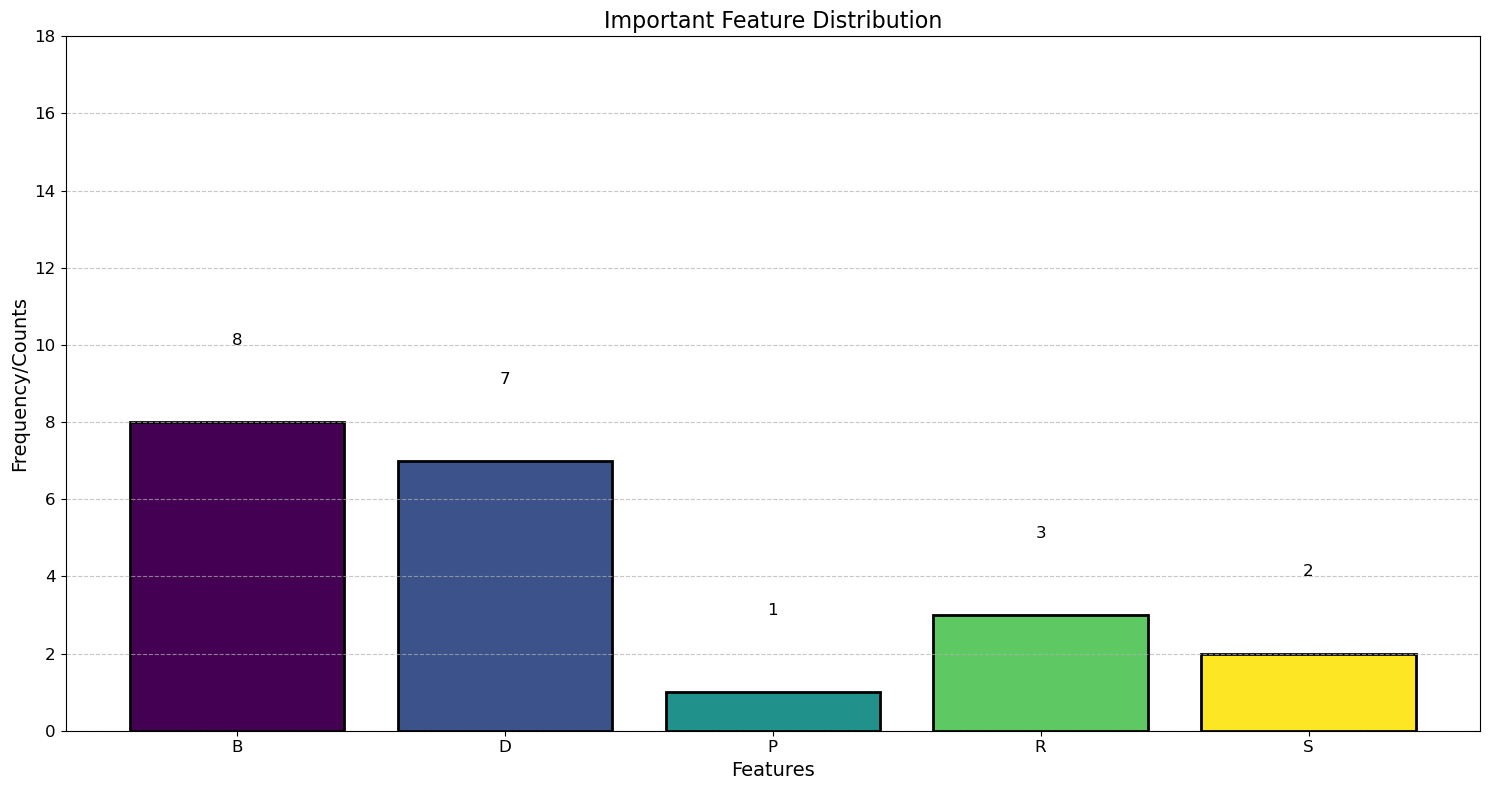

In [ ]:
categories = ['B', 'D', 'P', 'R', 'S']
cat_count_values = [8, 7, 1, 3, 2]
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
plt.figure(figsize=(15, 8))
plt.bar(categories, cat_count_values, color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Frequency/Counts', fontsize=14)
plt.title('Important Feature Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(cat_count_values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(cat_count_values) + 10)
plt.tight_layout()
plt.show()

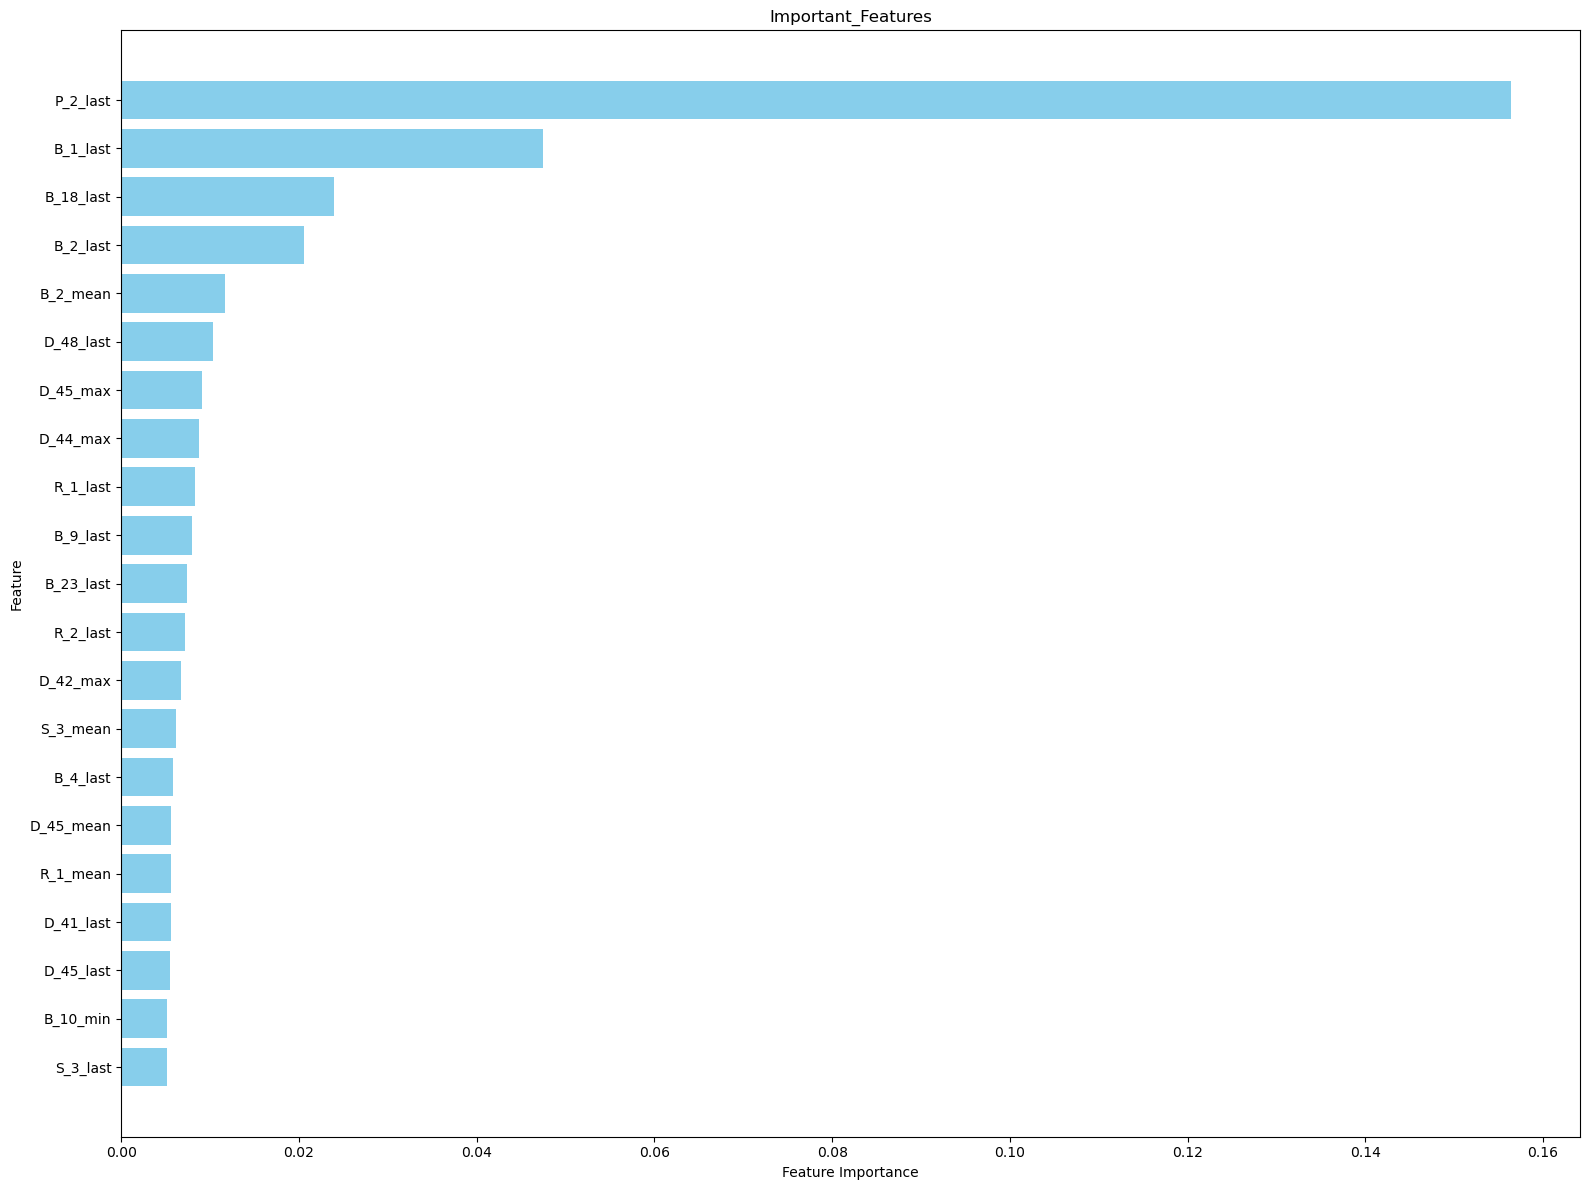

In [ ]:
plt.figure(figsize=(16, 12))
plt.barh(features_selected['Feature'][::-1], features_selected['Feature_Importance'][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Important_Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
Grid_Search_Results = pd.DataFrame(columns = ["Number Trees", "Learning Rate", 'Subsample', '% Features', 'Weight of Default',"AUC Train", "AUC Test 1", "AUC Test 2"])

Counter = 0
for n_trees in [50, 100, 300]:
    for lr in [0.01, 0.1]:
        for subsample in [0.5, 0.8]:
            for colsample in [0.5, 1.0]:
                for weight in [1, 5, 10]:
                    xgb_instance = XGBClassifier(n_estimators= n_trees, learning_rate = lr,subsample=subsample, colsample_bytree=colsample, scale_pos_weight=weight)
                    model = xgb_instance.fit(X_train, Y_train)
                    Grid_Search_Results.loc[Counter,"Number Trees"] = n_trees
                    Grid_Search_Results.loc[Counter,"Learning Rate"] = lr
                    Grid_Search_Results.loc[Counter,"Subsample"] = subsample
                    Grid_Search_Results.loc[Counter,"% Features"] = colsample
                    Grid_Search_Results.loc[Counter,"Weight of Default"] = weight
                    Grid_Search_Results.loc[Counter,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])
                    Grid_Search_Results.loc[Counter,"AUC Test 1"] = roc_auc_score(Y_test_1, model.predict_proba(X_test_1)[:,1])
                    Grid_Search_Results.loc[Counter,"AUC Test 2"] = roc_auc_score(Y_test_2, model.predict_proba(X_test_2)[:,1])

                    Counter = Counter + 1
                    Grid_Search_Results.to_csv("Grid_Search_Results.csv")

In [ ]:
#Grid_Search_Results=pd.read_csv("Grid_Search_Results.csv")

#Grid_Search_Results.drop(columns=['Unnamed: 0'], inplace=True)

print(Grid_Search_Results)

   Number Trees Learning Rate Subsample % Features Weight of Default  \
0            50          0.01       0.5        0.5                 1   
1            50          0.01       0.5        0.5                 5   
2            50          0.01       0.5        0.5                10   
3            50          0.01       0.5        1.0                 1   
4            50          0.01       0.5        1.0                 5   
..          ...           ...       ...        ...               ...   
67          300           0.1       0.8        0.5                 5   
68          300           0.1       0.8        0.5                10   
69          300           0.1       0.8        1.0                 1   
70          300           0.1       0.8        1.0                 5   
71          300           0.1       0.8        1.0                10   

   AUC Train AUC Test 1 AUC Test 2  
0   0.954181   0.954283   0.953809  
1   0.952955   0.953018   0.952584  
2   0.952571   0.952563 

In [ ]:
AUC_AVG = (Grid_Search_Results['AUC Train'] + Grid_Search_Results['AUC Test 1'] + Grid_Search_Results['AUC Test 2']) / 3
AUC_SD = []
for i in range(72):
    AUC_SD.append(np.std([Grid_Search_Results['AUC Train'][i], Grid_Search_Results['AUC Test 1'][i], Grid_Search_Results['AUC Test 2'][i]]))

Grid_Search_Results['AUC AVG'] = AUC_AVG
Grid_Search_Results['AUC SD'] = AUC_SD

In [ ]:
Grid_Search_Results
# Check data types of features
#print(f"Data Types:\n{Grid_Search_Results.dtypes}")

,Number Trees,Learning Rate,Subsample,% Features,Weight of Default,AUC Train,AUC Test 1,AUC Test 2,AUC AVG,AUC SD
0,50,0.01,0.5,0.5,1,0.954181,0.954283,0.953809,0.954091,0.000204
1,50,0.01,0.5,0.5,5,0.952955,0.953018,0.952584,0.952852,0.000191
2,50,0.01,0.5,0.5,10,0.952571,0.952563,0.952201,0.952445,0.000173
3,50,0.01,0.5,1.0,1,0.952424,0.952395,0.952016,0.952278,0.000186
4,50,0.01,0.5,1.0,5,0.951215,0.951004,0.950564,0.950928,0.000271
...,...,...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.981331,0.979724,0.979586,0.980214,0.000792
68,300,0.1,0.8,0.5,10,0.980155,0.978695,0.978542,0.97913,0.000727
69,300,0.1,0.8,1.0,1,0.984164,0.982254,0.982272,0.982897,0.000896
70,300,0.1,0.8,1.0,5,0.982992,0.981371,0.981247,0.98187,0.000795


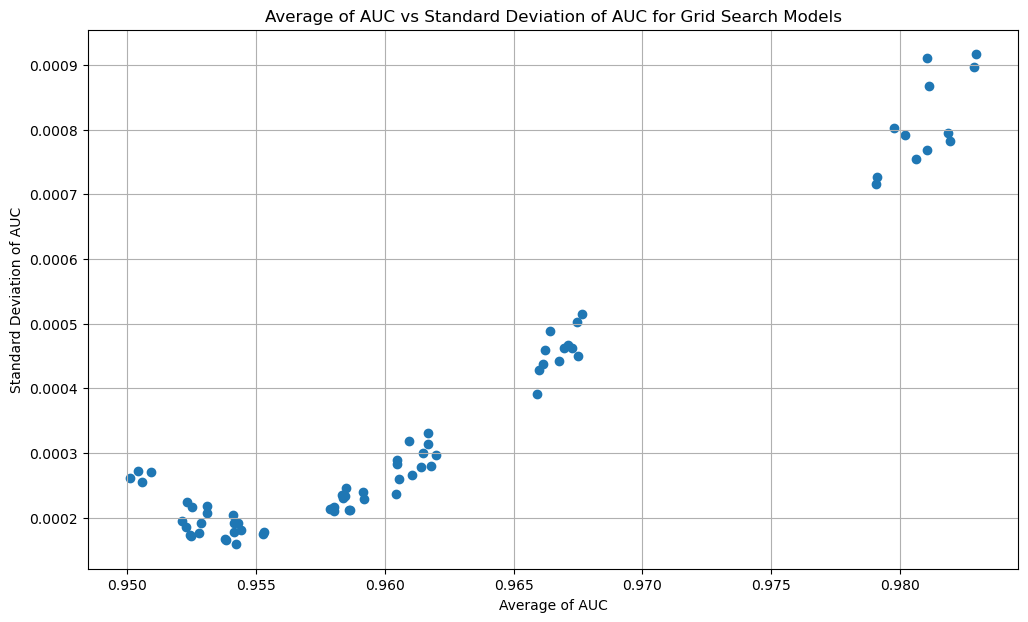

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(Grid_Search_Results['AUC AVG'], Grid_Search_Results['AUC SD'])
xlab = 'Average of AUC'
ylab = 'Standard Deviation of AUC'
title = 'Average of AUC vs Standard Deviation of AUC for Grid Search Models'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.grid(True)
plt.show()

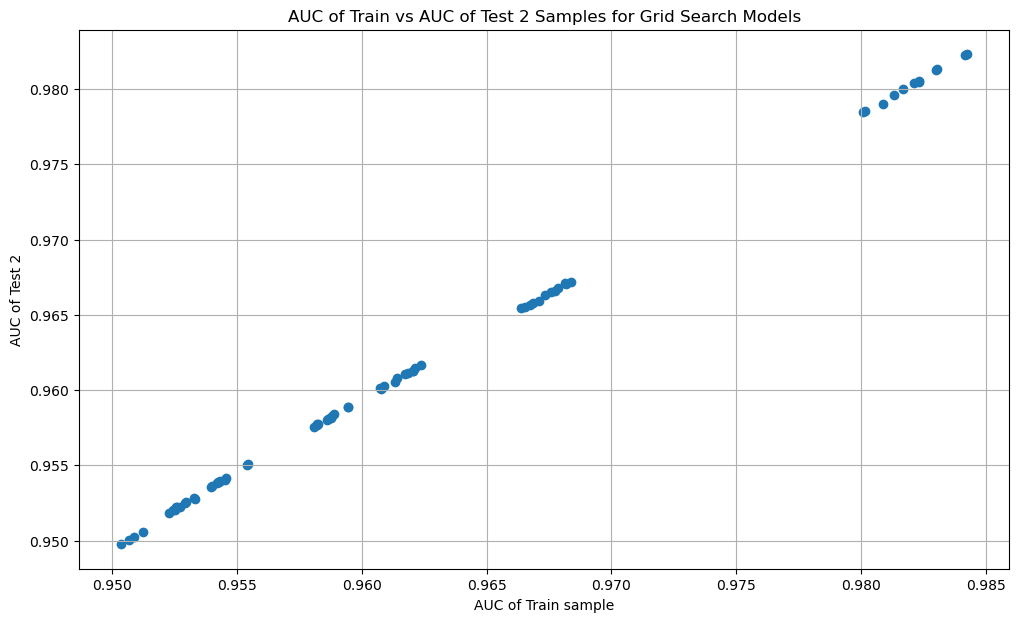

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(Grid_Search_Results['AUC Train'], Grid_Search_Results['AUC Test 2'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 2'
title = 'AUC of Train vs AUC of Test 2 Samples for Grid Search Models'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.grid(True)
plt.show()

In [ ]:
best_model_idx = Grid_Search_Results[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1).idxmax()
best_params = Grid_Search_Results.iloc[best_model_idx, :8].to_dict()
best_params


{'Number Trees': 300,
 'Learning Rate': 0.1,
 'Subsample': 0.5,
 '% Features': 1.0,
 'Weight of Default': 1,
 'AUC Train': 0.9842432221356414,
 'AUC Test 1': 0.9822778008652752,
 'AUC Test 2': 0.9823207647252432}

In [ ]:
best_model_Xgb=best_params
best_model_Xgb

{'Number Trees': 300,
 'Learning Rate': 0.1,
 'Subsample': 0.5,
 '% Features': 1.0,
 'Weight of Default': 1,
 'AUC Train': 0.9842432221356414,
 'AUC Test 1': 0.9822778008652752,
 'AUC Test 2': 0.9823207647252432}

In [ ]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

best_xgb_instance = XGBClassifier(
    n_estimators=best_params['Number Trees'],
    learning_rate=best_params['Learning Rate'],
    subsample=best_params['Subsample'],
    colsample_bytree=best_params['% Features'],
    scale_pos_weight=best_params['Weight of Default']
)

# Fit the model on the training data
best_xgb_model = best_xgb_instance.fit(X_train, Y_train)
best_xgb_model.save_model('best_xgb_model.json')

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer=shap.Explainer(best_xgb_model)
shap_values=explainer(X_test_2)

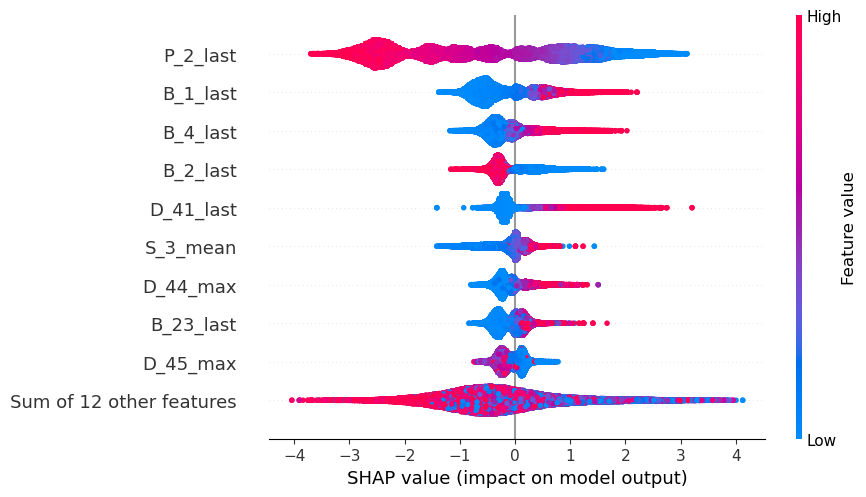

In [ ]:
shap.plots.beeswarm(shap_values)

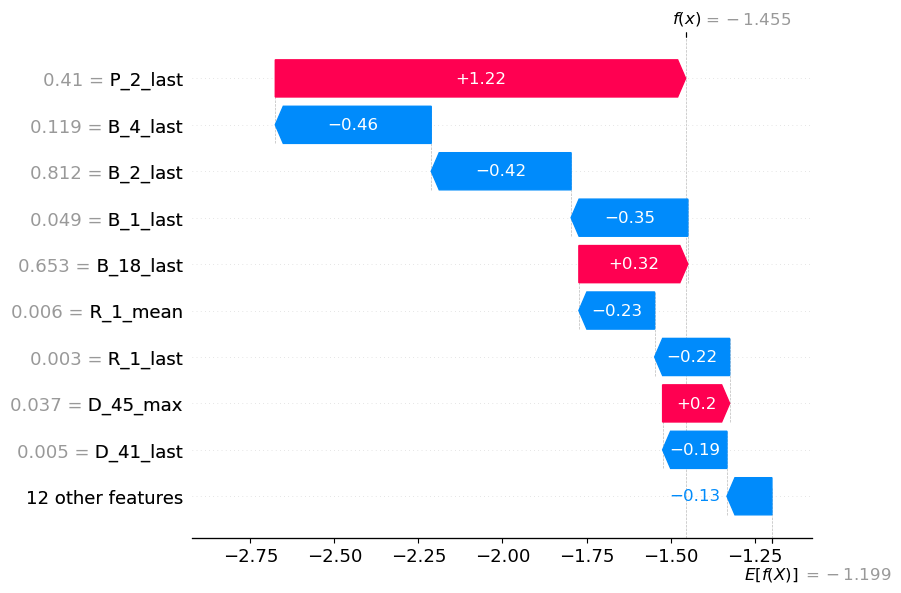

In [ ]:
shap.plots.waterfall(shap_values[150])

In [ ]:
# Identify the top 5 features with the highest average SHAP values
feature_names = X_test_2.columns
avg_shap_values = np.abs(shap_values.values).mean(axis=0)
top_features_idx = np.argsort(avg_shap_values)[-5:][::-1]
top_features = [feature_names[i] for i in top_features_idx]

# Calculate the requested summary statistics for the top features
summary_stats = []
for feature in top_features:
    feature_values = X_test_2[feature]
    feature_values_no_na = feature_values.dropna()  # Handle missing values
    summary = [
        feature,
        feature_values_no_na.min(),
        np.percentile(feature_values_no_na, 1),
        np.percentile(feature_values_no_na, 5),
        np.median(feature_values_no_na),
        np.percentile(feature_values_no_na, 95),
        np.percentile(feature_values_no_na, 99),
        feature_values_no_na.max(),
        feature_values_no_na.mean(),
        100 * (len(X_test_2) - len(feature_values_no_na)) / len(X_test_2)  # Percent missing
    ]
    summary_stats.append(summary)

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(
    summary_stats,
    columns=["Feature", "Min", "1st Percentile", "5th Percentile", "Median", "95th Percentile", "99th Percentile", "Max", "Mean", "%Missing"]
)

print(summary_df)

     Feature           Min  1st Percentile  5th Percentile    Median  \
0   P_2_last -3.915485e-01       -0.080750        0.135433  0.694409   
1   B_1_last -3.610407e-01        0.000490        0.002091  0.031745   
2   B_4_last  4.237670e-07        0.000825        0.003851  0.091879   
3   B_2_last  2.317209e-06        0.001756        0.008880  0.813630   
4  D_41_last  1.858897e-07        0.000130        0.000608  0.006009   

   95th Percentile  99th Percentile       Max      Mean  %Missing  
0         0.978846         1.006341  1.009994  0.643250       0.0  
1         0.655259         1.052372  1.323996  0.135610       0.0  
2         0.689480         1.103397  3.483551  0.191710       0.0  
3         1.008452         1.009707  1.009999  0.596552       0.0  
4         0.648679         1.562106  8.988807  0.101419       0.0  


AUC on Train: 0.9842432221356414
AUC on Test 1: 0.9822778008652752
AUC on Test 2: 0.9823207647252432


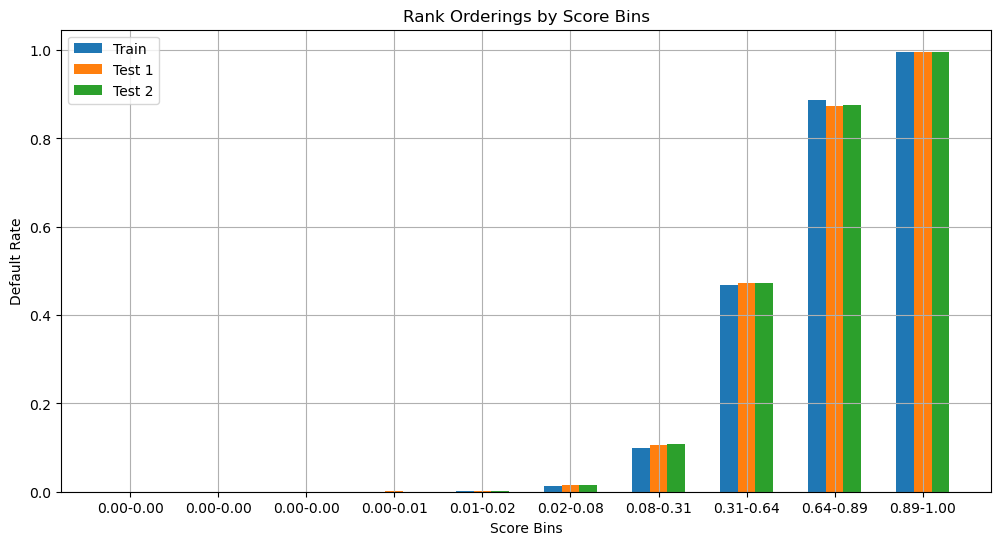

In [ ]:
# Calculate AUC on each sample
auc_train = roc_auc_score(Y_train, best_xgb_model.predict_proba(X_train)[:, 1])
auc_test1 = roc_auc_score(Y_test_1, best_xgb_model.predict_proba(X_test_1)[:, 1])
auc_test2 = roc_auc_score(Y_test_2, best_xgb_model.predict_proba(X_test_2)[:, 1])

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = best_xgb_model.predict_proba(X_train)[:, 1]
bins = np.percentile(train_scores, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Apply the same thresholds to test samples
test1_scores = best_xgb_model.predict_proba(X_test_1)[:, 1]
test2_scores = best_xgb_model.predict_proba(X_test_2)[:, 1]

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
   default_rates = []
   for i in range(len(bins) - 1):
       mask = (scores >= bins[i]) & (scores <= bins[i + 1])
       if np.sum(mask) > 0:
           default_rate = np.sum(y[mask]) / np.sum(mask)
           default_rates.append(default_rate)
       else:
           default_rates.append(0.0)
   return default_rates

default_rates_train = calculate_default_rate(train_scores, Y_train)
default_rates_test1 = calculate_default_rate(test1_scores, Y_test_1)
default_rates_test2 = calculate_default_rate(test2_scores, Y_test_2)

# Modify the x-axis labels to include the values of the score bins
x_labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Create a figure for the bar chart
plt.figure(figsize=(12, 6))

# Plot the default rates for different samples in the respective score bins
width = 0.2
x_indexes = np.arange(len(x_labels))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

# Set labels, title, and x-axis ticks
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, x_labels)  # Use modified x_labels

# Add a legend, grid, and display the plot
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
outlier = pd.DataFrame(columns = ["Column Name", "P1", "P99"])

counter = 0
for feature in X_train.columns:
  outlier.loc[counter, "Column Name"] = feature
  outlier.loc[counter, "P1"] = X_train[feature].quantile(0.01)
  outlier.loc[counter, "P99"] = X_train[feature].quantile(0.99)
  counter = counter + 1

outlier

,Column Name,P1,P99
0,P_2_last,-0.083326,1.006297
1,B_1_last,0.000496,1.054228
2,B_18_last,0.002921,1.009726
3,B_2_last,0.001838,1.009699
4,B_2_mean,0.022361,1.006184
5,D_48_last,0.001673,1.037542
6,D_45_max,0.014423,1.019488
7,D_44_max,0.007083,1.252971
8,R_1_last,0.000111,1.501977
9,B_9_last,0.000236,0.975871


In [ ]:
for counter in range(outlier.shape[0]):
    column_name = outlier.loc[counter, "Column Name"]
    p1 = outlier.loc[counter, "P1"]
    p99 = outlier.loc[counter, "P99"]

    X_train.loc[X_train[column_name] < p1, column_name] = p1
    X_train.loc[X_train[column_name] > p99, column_name] = p99

In [ ]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2_last,774957.0,0.643863,0.266174,-0.083326,0.461441,0.695188,0.868023,1.006297
B_1_last,774957.0,0.134558,0.219722,0.000496,0.008804,0.031952,0.149029,1.054228
B_18_last,774957.0,0.574319,0.375665,0.002921,0.198959,0.592981,1.003107,1.009726
B_2_last,774957.0,0.595426,0.411882,0.001838,0.072543,0.813588,1.002085,1.009699
B_2_mean,774957.0,0.620628,0.355692,0.022361,0.246981,0.814260,0.916809,1.006184
D_48_last,774957.0,0.398857,0.318281,0.001673,0.097556,0.381039,0.665842,1.037542
D_45_max,774957.0,0.272022,0.238261,0.014423,0.072099,0.211084,0.394565,1.019488
D_44_max,774957.0,0.177461,0.252573,0.007083,0.009462,0.118237,0.257845,1.252971
R_1_last,774957.0,0.104953,0.271288,0.000111,0.002959,0.005900,0.008872,1.501977
B_9_last,774957.0,0.195105,0.263269,0.000236,0.005659,0.023594,0.402814,0.975871


In [ ]:
for counter in range(outlier.shape[0]):
    column_name = outlier.loc[counter, "Column Name"]
    p1 = outlier.loc[counter, "P1"]
    p99 = outlier.loc[counter, "P99"]

    X_test_1.loc[X_test_1[column_name] < p1, column_name] = p1
    X_test_2.loc[X_test_2[column_name] < p1, column_name] = p1

    X_test_1.loc[X_test_1[column_name] > p99, column_name] = p99
    X_test_2.loc[X_test_2[column_name] > p99, column_name] = p99

In [ ]:
X_test_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2_last,166062.0,0.643877,0.266615,-0.083326,0.461389,0.695136,0.867509,1.006297
B_1_last,166062.0,0.133978,0.219340,0.000496,0.008802,0.031695,0.148155,1.054228
B_18_last,166062.0,0.575063,0.375418,0.002921,0.199177,0.593291,1.003108,1.009726
B_2_last,166062.0,0.596690,0.411723,0.001838,0.073590,0.813638,1.002131,1.009699
B_2_mean,166062.0,0.621665,0.355505,0.022361,0.249315,0.814285,0.919538,1.006184
D_48_last,166062.0,0.398761,0.318083,0.001673,0.097521,0.381039,0.664671,1.037542
D_45_max,166062.0,0.271912,0.237929,0.014423,0.072447,0.211115,0.393702,1.019488
D_44_max,166062.0,0.177558,0.252381,0.007083,0.009468,0.118237,0.257859,1.252971
R_1_last,166062.0,0.104820,0.271521,0.000111,0.002952,0.005908,0.008871,1.501977
B_9_last,166062.0,0.194367,0.263220,0.000236,0.005643,0.022835,0.398706,0.975871


In [ ]:
X_test_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2_last,166063.0,0.643904,0.265225,-0.083326,0.462221,0.694409,0.866933,1.006297
B_1_last,166063.0,0.134135,0.219240,0.000496,0.008797,0.031745,0.148336,1.054228
B_18_last,166063.0,0.574833,0.375096,0.002921,0.199266,0.593259,1.003087,1.009726
B_2_last,166063.0,0.596560,0.411970,0.001838,0.072672,0.813630,1.002143,1.009699
B_2_mean,166063.0,0.621341,0.355715,0.022361,0.248345,0.814288,0.919076,1.006184
D_48_last,166063.0,0.398498,0.318119,0.001673,0.097553,0.381039,0.663962,1.037542
D_45_max,166063.0,0.272133,0.238179,0.014423,0.072131,0.210983,0.394800,1.019488
D_44_max,166063.0,0.177896,0.252860,0.007083,0.009464,0.118237,0.257832,1.252971
R_1_last,166063.0,0.104079,0.269110,0.000111,0.002947,0.005910,0.008882,1.501977
B_9_last,166063.0,0.194355,0.263282,0.000236,0.005639,0.022863,0.398000,0.975871


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)


X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test_1 = pd.DataFrame(sc.transform(X_test_1), columns = X_test_1.columns)
X_test_2 = pd.DataFrame(sc.transform(X_test_2), columns = X_test_2.columns)

In [ ]:
X_train.fillna(0,inplace=True)
X_test_1.fillna(0,inplace=True)
X_test_2.fillna(0,inplace=True)

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from sklearn.metrics import roc_auc_score

In [ ]:
Grid_Search_Results_nn = pd.DataFrame(columns = ["HL", "Nodes", "Activation Function","Dropout", "Batch Size",
                                              "AUC Train", "AUC Test 1", "AUC Test 2"])

In [ ]:
Counter = 0
for n_layers in [2, 4]:
    for n_nodes in [4, 6]:
        for activation in ['relu', 'tanh']:
            for dropout in [0.5 , 1.0]:
                for batch_size in [100, 10000]:
                    model = Sequential()
                    model.add(Dense(n_nodes, input_dim=X_train.shape[1], activation=activation))
                    if dropout<1.0:
                            model.add(Dropout(dropout))
                    for _ in range(n_layers - 1):
                        model.add(Dense(n_nodes, activation=activation))
                        if dropout<1.0:
                            model.add(Dropout(dropout))
                    model.add(Dense(1, activation='sigmoid'))
                    model.compile(optimizer=Adam(), loss=BinaryCrossentropy())
                    model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=0)

                    Grid_Search_Results_nn.loc[Counter,"HL"] = n_layers
                    Grid_Search_Results_nn.loc[Counter,"Nodes"] = n_nodes
                    Grid_Search_Results_nn.loc[Counter,"Activation Function"] = activation
                    Grid_Search_Results_nn.loc[Counter,"Dropout"] = dropout
                    Grid_Search_Results_nn.loc[Counter,"Batch Size"] = batch_size
                    Grid_Search_Results_nn.loc[Counter,"AUC Train"] = roc_auc_score(Y_train, model.predict(X_train))
                    Grid_Search_Results_nn.loc[Counter,"AUC Test 1"] = roc_auc_score(Y_test_1, model.predict(X_test_1))
                    Grid_Search_Results_nn.loc[Counter,"AUC Test 2"] = roc_auc_score(Y_test_2, model.predict(X_test_2))

                    Counter = Counter + 1
                    Grid_Search_Results_nn.to_csv("Grid_Search_Results_NN.csv")

C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


C:\Users\muvva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24218/24218 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [ ]:
Grid_Search_Results_nn

,HL,Nodes,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,2,4,relu,0.5,100,0.951225,0.951866,0.951099
1,2,4,relu,0.5,10000,0.950474,0.951192,0.950378
2,2,4,relu,1.0,100,0.953484,0.953965,0.95331
3,2,4,relu,1.0,10000,0.950516,0.951035,0.950493
4,2,4,tanh,0.5,100,0.950566,0.951274,0.95051
5,2,4,tanh,0.5,10000,0.950335,0.951036,0.950258
6,2,4,tanh,1.0,100,0.953649,0.954184,0.953577
7,2,4,tanh,1.0,10000,0.950186,0.950789,0.95014
8,2,6,relu,0.5,100,0.951458,0.952074,0.951333
9,2,6,relu,0.5,10000,0.950958,0.951617,0.950873


In [ ]:
AUC_AVG = (Grid_Search_Results_nn['AUC Train'] + Grid_Search_Results_nn['AUC Test 1'] + Grid_Search_Results_nn['AUC Test 2']) / 3
AUC_SD = []
for i in range(32):
    AUC_SD.append(np.std([Grid_Search_Results_nn['AUC Train'][i], Grid_Search_Results_nn['AUC Test 1'][i], Grid_Search_Results_nn['AUC Test 2'][i]]))
Grid_Search_Results_nn['AUC AVG'] = AUC_AVG
Grid_Search_Results_nn['AUC SD'] = AUC_SD

In [ ]:
Grid_Search_Results_nn

,HL,Nodes,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2,AUC AVG,AUC SD
0,2,4,relu,0.5,100,0.951225,0.951866,0.951099,0.951397,0.000336
1,2,4,relu,0.5,10000,0.950474,0.951192,0.950378,0.950681,0.000363
2,2,4,relu,1.0,100,0.953484,0.953965,0.95331,0.953587,0.000277
3,2,4,relu,1.0,10000,0.950516,0.951035,0.950493,0.950681,0.000250
4,2,4,tanh,0.5,100,0.950566,0.951274,0.95051,0.950783,0.000348
5,2,4,tanh,0.5,10000,0.950335,0.951036,0.950258,0.950543,0.000350
6,2,4,tanh,1.0,100,0.953649,0.954184,0.953577,0.953803,0.000270
7,2,4,tanh,1.0,10000,0.950186,0.950789,0.95014,0.950372,0.000295
8,2,6,relu,0.5,100,0.951458,0.952074,0.951333,0.951621,0.000324
9,2,6,relu,0.5,10000,0.950958,0.951617,0.950873,0.951149,0.000333


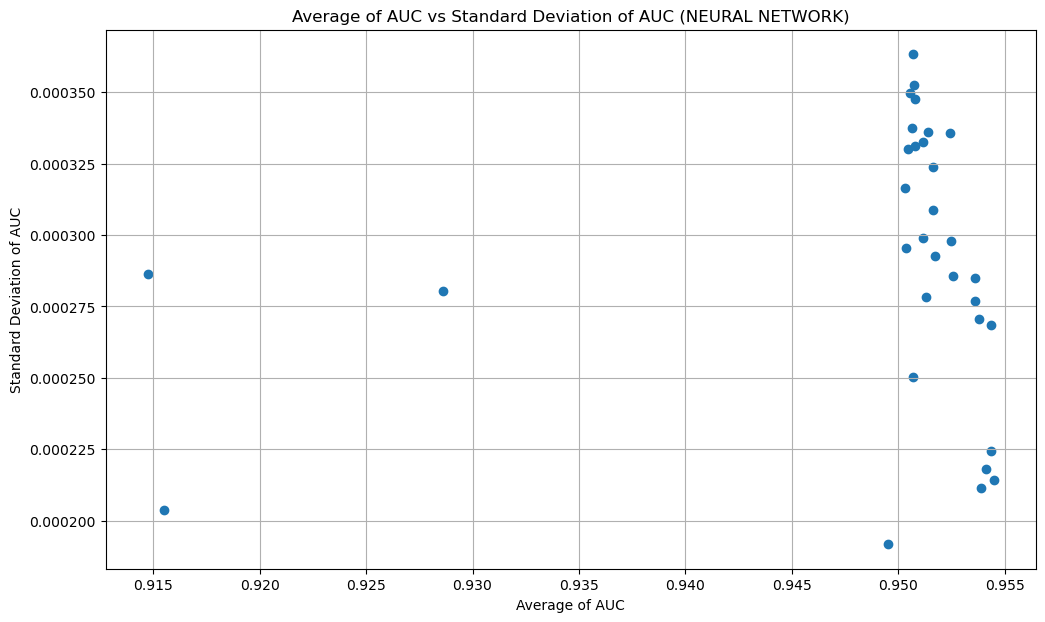

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(Grid_Search_Results_nn['AUC AVG'], Grid_Search_Results_nn['AUC SD'])
xlab = 'Average of AUC'
ylab = 'Standard Deviation of AUC'
title = 'Average of AUC vs Standard Deviation of AUC (NEURAL NETWORK)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.grid(True)
plt.show()

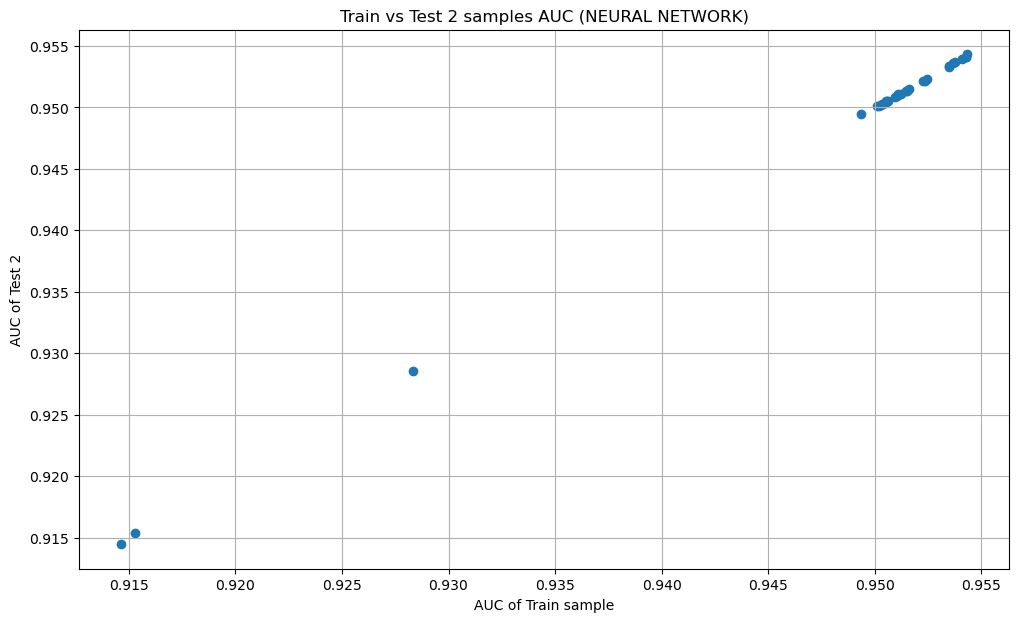

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(Grid_Search_Results_nn['AUC Train'], Grid_Search_Results_nn['AUC Test 2'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 2'
title = 'Train vs Test 2 samples AUC (NEURAL NETWORK)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.grid(True)
plt.show()

In [ ]:
# Calculate the mean of AUC Test1 and AUC Test2
Grid_Search_Results_nn['Mean AUC Test'] = (Grid_Search_Results_nn['AUC Test 1'] + Grid_Search_Results_nn['AUC Test 2']) / 2

# Find the row with the highest mean AUC Test score
best_model_nn = Grid_Search_Results_nn.loc[Grid_Search_Results_nn['Mean AUC Test'].idxmax()]

# Print the best model information
print("Best Model (based on Mean AUC Test):")
print(best_model_nn)

Best Model (based on Mean AUC Test):
HL                            4
Nodes                         6
Activation Function        tanh
Dropout                     1.0
Batch Size                  100
AUC Train              0.954323
AUC Test 1             0.954781
AUC Test 2             0.954331
AUC AVG                0.954478
AUC SD                 0.000214
Mean AUC Test          0.954556
Name: 30, dtype: object


In [ ]:
# Step 15: Choose best Neural Network model
best_model_idx = Grid_Search_Results_nn[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1).idxmax()
best_params = Grid_Search_Results_nn.iloc[best_model_idx, :5].to_dict()
best_params

{'HL': 4,
 'Nodes': 6,
 'Activation Function': 'tanh',
 'Dropout': 1.0,
 'Batch Size': 100}

In [ ]:
# hyperparameters of the best model
best_n_layers = int(best_model_nn['HL'])
best_n_nodes = int(best_model_nn['Nodes'])
best_activation = best_model_nn['Activation Function']
best_dropout = float(best_model_nn['Dropout'])
best_batch_size = int(best_model_nn['Batch Size'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# best model with optimum parameters
nn_best_model = Sequential()
nn_best_model.add(Dense(best_n_nodes, activation=best_activation, input_shape=(X_train.shape[1],)))
for _ in range(best_n_layers - 1):
    nn_best_model.add(Dense(best_n_nodes, activation=best_activation))
    if best_dropout < 1.0:
        nn_best_model.add(Dropout(best_dropout))
nn_best_model.add(Dense(1, activation='sigmoid'))

# Compile the best model
nn_best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Train the best model on the entire training set
nn_best_model.fit(X_train, Y_train, epochs=20, batch_size=best_batch_size, verbose=1)

nn_best_model.save('nn_best_model.keras')

Epoch 1/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - AUC: 0.9280 - loss: 0.2822
Epoch 2/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - AUC: 0.9523 - loss: 0.2367
Epoch 3/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.9533 - loss: 0.2342
Epoch 4/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.9535 - loss: 0.2335
Epoch 5/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.9533 - loss: 0.2342
Epoch 6/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.9539 - loss: 0.2326
Epoch 7/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.9537 - loss: 0.2330
Epoch 8/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - AUC: 0.9537 - loss: 0.2329
Epoch 9/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.9537 - loss: 0.2332
Epoch 10/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.9535 - loss: 0.2336
Epoch 11/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.9536 - loss: 0.2330
Epoch 12/20
7750/7750 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - AUC: 0.9538 - lo

24218/24218 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
5190/5190 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
AUC on Train: 0.954403953947955
AUC on Test 1: 0.9547473835568925
AUC on Test 2: 0.9542318331809746


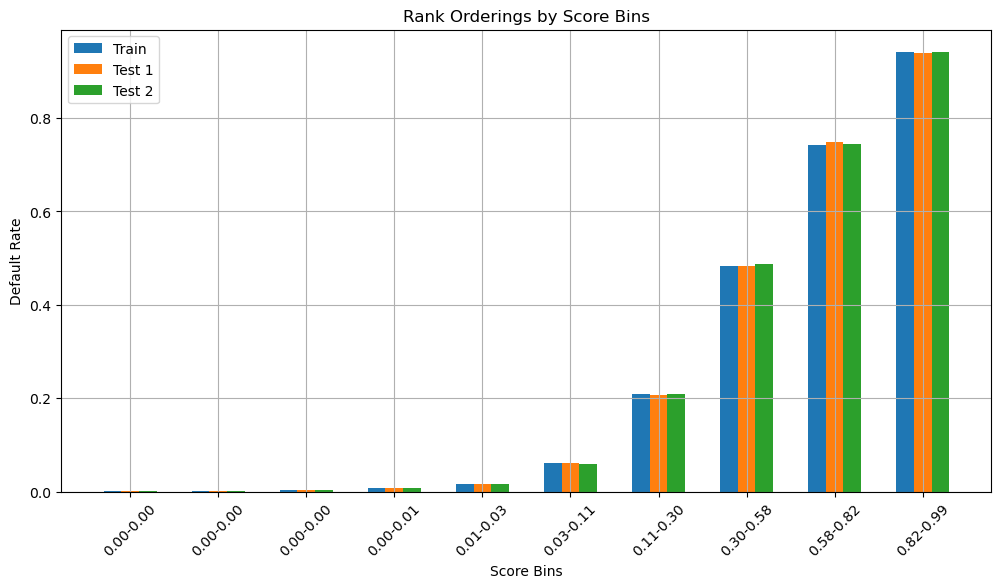

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate AUC on each sample
y_train_pred = nn_best_model.predict(X_train)
y_test1_pred = nn_best_model.predict(X_test_1)
y_test2_pred = nn_best_model.predict(X_test_2)

auc_train = roc_auc_score(Y_train, y_train_pred)
auc_test1 = roc_auc_score(Y_test_1, y_test1_pred)
auc_test2 = roc_auc_score(Y_test_2, y_test2_pred)

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = y_train_pred.reshape(-1)
bins = np.percentile(train_scores, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Calculate the value ranges for each bin
bin_ranges = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Apply the same thresholds to test samples
test1_scores = y_test1_pred.reshape(-1)
test2_scores = y_test2_pred.reshape(-1)

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
    default_rates = []
    for i in range(len(bins) - 1):
        mask = (scores >= bins[i]) & (scores <= bins[i + 1])
        if np.sum(mask) > 0:
            default_rate = np.sum(y[mask]) / np.sum(mask)
            default_rates.append(default_rate)
        else:
            default_rates.append(0.0)
    return default_rates

default_rates_train = calculate_default_rate(train_scores, Y_train)
default_rates_test1 = calculate_default_rate(test1_scores, Y_test_1)
default_rates_test2 = calculate_default_rate(test2_scores, Y_test_2)

x_indexes = np.arange(len(bin_ranges))
width=0.2
plt.figure(figsize=(12, 6))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, bin_ranges, rotation=45)  # Display bin ranges on the x-axis
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_model_Xgb

{'Number Trees': 300,
 'Learning Rate': 0.1,
 'Subsample': 0.5,
 '% Features': 1.0,
 'Weight of Default': 1,
 'AUC Train': 0.9842432221356414,
 'AUC Test 1': 0.9822778008652752,
 'AUC Test 2': 0.9823207647252432}

In [ ]:
best_model_nn

HL                            4
Nodes                         6
Activation Function        tanh
Dropout                     1.0
Batch Size                  100
AUC Train              0.954323
AUC Test 1             0.954781
AUC Test 2             0.954331
AUC AVG                0.954478
AUC SD                 0.000214
Mean AUC Test          0.954556
Name: 30, dtype: object

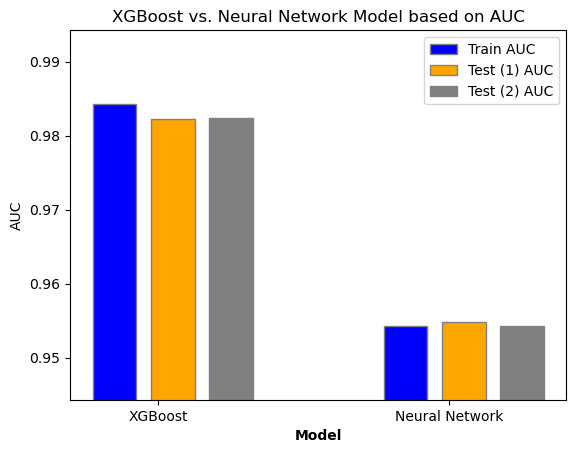

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Data for plotting
models = ['XGBoost', 'Neural Network']
train_auc = [0.9842432221356414, 0.954323]  # Placeholder values
test1_auc = [0.9822778008652752, 0.954781]  # Placeholder values
test2_auc = [0.9823207647252432, 0.954331]  # Placeholder values

# Set up the bar width and positions
barWidth = 0.15
# r1 = [1, 2]
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

r1 = np.arange(len(train_auc))
r2 = [x + barWidth + 0.05 for x in r1]
r3 = [x + barWidth + 0.05 for x in r2]

# Create the bars
plt.bar(r1, train_auc, color='blue', width=barWidth, edgecolor='grey', label='Train AUC')
plt.bar(r2, test1_auc, color='orange', width=barWidth, edgecolor='grey', label='Test (1) AUC')
plt.bar(r3, test2_auc, color='grey', width=barWidth, edgecolor='grey', label='Test (2) AUC')

# Add labels and title
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_auc))], models)
plt.ylabel('AUC')
plt.title('XGBoost vs. Neural Network Model based on AUC')

plt.ylim(min(train_auc + test1_auc + test2_auc) - 0.01, max(train_auc + test1_auc + test2_auc) + 0.01)

# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
# AUC scores from best_model_row
auc_test1_xgb = best_model_Xgb['AUC Test 1']
auc_test2_xgb = best_model_Xgb['AUC Test 2']

# average AUC score for best_model_row
avg_auc_xgb = (auc_test1_xgb + auc_test2_xgb) / 2
print("Avg AUC value of XGB Model :",avg_auc_xgb)

# AUC scores from best_model_select
auc_test1_nn = best_model_nn['AUC Test 1']
auc_test2_nn = best_model_nn['AUC Test 2']

# average AUC score for best_model_select
avg_auc_nn = (auc_test1_nn + auc_test2_nn) / 2
print("Avg AUC value of NN Model :",avg_auc_nn)

# Determine the best model and label the AUC values
if avg_auc_xgb > avg_auc_nn:
    best_model = "XGB Model"  # XGBoost model is better
    best_avg_auc = avg_auc_xgb
    model_label = "Avg AUC value of "
else:
    best_model = "NN Model"  # Neural Network model is better
    best_avg_auc = avg_auc_nn
    model_label = "Avg AUC value of "


print(f"The best model is {best_model} with {model_label}: {best_avg_auc:.5f}")

Avg AUC value of XGB Model : 0.9822992827952592
Avg AUC value of NN Model : 0.9545562626577813
The best model is XGB Model with Avg AUC value of : 0.98230


In [ ]:
best_xgb_model.score(X_test_1, Y_test_1)

0.7037732894942853

In [ ]:
nn_best_model.evaluate(X_train, Y_train, verbose=0)

[0.23310090601444244, 0.9542186856269836]

In [ ]:
# Step 17: Strategy function
def calculate_strategy_performance(data, target_col, model_output_col, balance_col, spend_col, threshold):
    accepted = data[data[model_output_col] < threshold]
    rejected = data[data[model_output_col] >= threshold]

    portfolio_default_rate = accepted[target_col].mean()

    accepted_defaulters = accepted[accepted[target_col] == 1]
    accepted_non_defaulters = accepted[accepted[target_col] == 0]

    defaulter_revenue = 0
    non_defaulter_revenue = accepted_non_defaulters[balance_col].mean() * 0.02 + accepted_non_defaulters[spend_col].mean() * 0.001
    non_defaulter_revenue *= 12  # For 12 months

    portfolio_revenue = non_defaulter_revenue * len(accepted_non_defaulters)

    return portfolio_default_rate, portfolio_revenue

In [ ]:
X_train.columns

Index(['P_2_last', 'B_1_last', 'B_18_last', 'B_2_last', 'B_2_mean',
       'D_48_last', 'D_45_max', 'D_44_max', 'R_1_last', 'B_9_last',
       'B_23_last', 'R_2_last', 'D_42_max', 'S_3_mean', 'B_4_last',
       'D_45_mean', 'R_1_mean', 'D_41_last', 'D_45_last', 'B_10_min',
       'S_3_last'],
      dtype='object')

In [ ]:
best_xgb_model.load_model('best_xgb_model.json')

In [ ]:
best_xgb_model

XGBClassifier(base_score='2.6620495E-1', booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feature_types=['float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'flo...
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Get predicted probabilities for the train dataset
xgb_probs_train = best_xgb_model.predict_proba(X_train)

# Get predicted probabilities for the test1 dataset
xgb_probs_test1 = best_xgb_model.predict_proba(X_test_1)

# Get predicted probabilities for the test2 dataset
xgb_probs_test2 = best_xgb_model.predict_proba(X_test_2)

In [ ]:

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the training data
default_rates_train = []
portfolio_revenues_train = []
applicant_counts_train = []

# Choose your desired spend and balance features for the training data
spend_feature_train = X_train['S_3_mean']
balance_feature_train = X_train['B_2_mean']

df1['S_2']= pd.to_datetime(df1['S_2'])
# Get the date feature "S_2" from df_new_all
date_feature_train = df1['S_2']

# Calculate the average spend and balance for the last 6 months i.e. November 2017 to April 2018 for the training data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_train = X_train[(date_feature_train >= start_date) & (date_feature_train <= end_date)]
average_spend_train = np.mean(filtered_data_train['S_3_mean'])
average_balance_train = np.mean(filtered_data_train['B_2_mean'])

# Calculate the monthly revenue for 1 customer for the training data
monthly_revenue_train = average_balance_train * 0.02 + average_spend_train * 0.001

# Calculate the expected annual revenue for the training data over the next 12 months
expected_revenue_train = monthly_revenue_train * 12

for threshold in thresholds:
    # Filter applicants based on the threshold for the training data
    accepted_indices_train = xgb_probs_train[:, 1] < threshold  # Results in the true and False list format
    total_applicants_train = len(accepted_indices_train) #Trained data length

    # Calculate the number of applicants who defaulted for the training data
    defaulted_applicants_train = np.sum(Y_train[accepted_indices_train])
    default_rate_train = defaulted_applicants_train / total_applicants_train # Calculate the default rate among all applicants for the training data
    portfolio_revenue_value_train = np.sum(expected_revenue_train * accepted_indices_train)

    default_rates_train.append(default_rate_train)
    portfolio_revenues_train.append(portfolio_revenue_value_train)
    applicant_counts_train.append(total_applicants_train)

# Print the results for each threshold for the training data
for i, threshold in enumerate(thresholds):
    print(f"Training Data -> Threshold: {threshold:.1f}, Default Rate: {default_rates_train[i]}, Portfolio Revenue: ${portfolio_revenues_train[i]:.2f}, Number of Applicants: {applicant_counts_train[i]}\n")

C:\Users\muvva\AppData\Local\Temp\ipykernel_20364\4032920219.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data_train = X_train[(date_feature_train >= start_date) & (date_feature_train <= end_date)]


Training Data -> Threshold: 0.1, Default Rate: 0.0015846040489988476, Portfolio Revenue: $71714.68, Number of Applicants: 774957

Training Data -> Threshold: 0.2, Default Rate: 0.005080281873703961, Portfolio Revenue: $77612.93, Number of Applicants: 774957

Training Data -> Threshold: 0.3, Default Rate: 0.010554133971304214, Portfolio Revenue: $81747.40, Number of Applicants: 774957

Training Data -> Threshold: 0.4, Default Rate: 0.019086220267705175, Portfolio Revenue: $85242.89, Number of Applicants: 774957

Training Data -> Threshold: 0.5, Default Rate: 0.03190370562495726, Portfolio Revenue: $88705.53, Number of Applicants: 774957

Training Data -> Threshold: 0.6, Default Rate: 0.0486465700677586, Portfolio Revenue: $92215.24, Number of Applicants: 774957

Training Data -> Threshold: 0.7, Default Rate: 0.07245176183968917, Portfolio Revenue: $96033.85, Number of Applicants: 774957

Training Data -> Threshold: 0.8, Default Rate: 0.10544197936143554, Portfolio Revenue: $100472.68, N

In [ ]:
average_spend_train

0.22834036254683554

In [ ]:
average_balance_train

0.6191911309105269

In [ ]:
accepted_indices_train = xgb_probs_train[:, 1] < 0.5
total_applicants_train = len(accepted_indices_train)
defaulted_applicants_train = np.sum(Y_train[accepted_indices_train])
defaulted_applicants_train
default_rate_train = defaulted_applicants_train / total_applicants_train
default_rate_train
portfolio_revenue_value_train = np.sum(expected_revenue_train * accepted_indices_train)
portfolio_revenue_value_train

88705.52948177622

In [ ]:

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the training data
default_rates_test1 = []
portfolio_revenues_test1 = []
applicant_counts_test1 = []

# Choose your desired spend and balance features for the training data
spend_feature_train = X_test_1['S_3_mean']
balance_feature_train = X_test_1['B_2_mean']

df1['S_2']= pd.to_datetime(df1['S_2'])
# Get the date feature "S_2" from df_new_all
date_feature_train = df1['S_2']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the training data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_test1 = X_train[(date_feature_train >= start_date) & (date_feature_train <= end_date)]
average_spend_test1 = np.mean(filtered_data_train['S_3_mean'])
average_balance_test1 = np.mean(filtered_data_train['B_2_mean'])

# Calculate the monthly revenue for 1 customer for the training data
monthly_revenue_test1 = average_balance_test1 * 0.02 + average_spend_test1 * 0.001

# Calculate the expected annual revenue for the training data over the next 12 months
expected_revenue_test1 = monthly_revenue_test1 * 12

for threshold in thresholds:
    accepted_indices_test1 = xgb_probs_test1[:, 1] < threshold  # True for accepted, False for rejected
    total_applicants_test1 = len(accepted_indices_test1)# Calculate the number of all applicants for the training data

    # Calculate the number of applicants who defaulted for the training data
    defaulted_applicants_test1 = np.sum(Y_test_1[accepted_indices_test1])

    # Calculate the default rate among all applicants for the training data
    default_rate_test1 = defaulted_applicants_test1 / total_applicants_test1

    # Calculate the portfolio revenue for the training data
    portfolio_revenue_value_test1 = np.sum(expected_revenue_test1 * accepted_indices_test1)

    # Append results to the lists for the training data
    default_rates_test1.append(default_rate_test1)
    portfolio_revenues_test1.append(portfolio_revenue_value_test1)
    applicant_counts_test1.append(total_applicants_test1)

# Print the results for each threshold for the training data
for i, threshold in enumerate(thresholds):
    print(f"Test_1 Data -> Threshold: {threshold:.1f}, Default Rate: {default_rates_test1[i]}, Portfolio Revenue: ${portfolio_revenues_test1[i]:.2f}, Number of Applicants: {applicant_counts_test1[i]}\n")

Test_1 Data -> Threshold: 0.1, Default Rate: 0.002191952403319242, Portfolio Revenue: $15378.87, Number of Applicants: 166062

Test_1 Data -> Threshold: 0.2, Default Rate: 0.005859257385795667, Portfolio Revenue: $16629.89, Number of Applicants: 166062

Test_1 Data -> Threshold: 0.3, Default Rate: 0.011640230757187075, Portfolio Revenue: $17500.13, Number of Applicants: 166062

Test_1 Data -> Threshold: 0.4, Default Rate: 0.02081150413700907, Portfolio Revenue: $18262.61, Number of Applicants: 166062

Test_1 Data -> Threshold: 0.5, Default Rate: 0.03374643205549734, Portfolio Revenue: $19009.20, Number of Applicants: 166062

Test_1 Data -> Threshold: 0.6, Default Rate: 0.05066180101407908, Portfolio Revenue: $19765.33, Number of Applicants: 166062

Test_1 Data -> Threshold: 0.7, Default Rate: 0.07421926750249906, Portfolio Revenue: $20592.89, Number of Applicants: 166062

Test_1 Data -> Threshold: 0.8, Default Rate: 0.10683961412002746, Portfolio Revenue: $21548.18, Number of Applicant

C:\Users\muvva\AppData\Local\Temp\ipykernel_20364\59043475.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data_test1 = X_train[(date_feature_train >= start_date) & (date_feature_train <= end_date)]


In [ ]:

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the test_2 data
default_rates_test2 = []
portfolio_revenues_test2 = []
applicant_counts_test2 = []

# Choose your desired spend and balance features for the test_2 data
spend_feature_test2 = X_test_2['S_3_mean']
balance_feature_test2 = X_test_2['B_2_mean']

df1['S_2']= pd.to_datetime(df1['S_2'])

# Get the date feature "S_2" from df_new_all
date_feature_test2 = df1['S_2']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the test_2 data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_test2 = X_test_2[(date_feature_test2 >= start_date) & (date_feature_test2 <= end_date)]
average_spend_test2 = np.mean(filtered_data_test2['S_3_mean'])
average_balance_test2 = np.mean(filtered_data_test2['B_2_mean'])

# Calculate the monthly revenue for 1 customer for the test_2 data
monthly_revenue_test2 = average_balance_test2 * 0.02 + average_spend_test2 * 0.001

# Calculate the expected annual revenue for the test_2 data over the next 12 months
expected_revenue_test2 = monthly_revenue_test2 * 12

# Iterate through the thresholds for the test_2 data
for threshold in thresholds:
    accepted_indices_test2 = xgb_probs_test2[:, 1] < threshold  # True for accepted, False for rejected
    total_applicants_test2 = len(accepted_indices_test2) # Calculate the number of all applicants for the test_2 data
    defaulted_applicants_test2 = np.sum(Y_test_2[accepted_indices_test2])# Calculate the number of applicants who defaulted for the test_2 data

    # Calculate the default rate among all applicants for the test_2 data
    default_rate_test2 = defaulted_applicants_test2 / total_applicants_test2

    # Calculate the portfolio revenue for the test_2 data
    portfolio_revenue_value_test2 = np.sum(expected_revenue_test2 * accepted_indices_test2)
    default_rates_test2.append(default_rate_test2)
    portfolio_revenues_test2.append(portfolio_revenue_value_test2)
    applicant_counts_test2.append(total_applicants_test2)

# Print the results for each threshold for the test_2 data
for i, threshold in enumerate(thresholds):
    print(f"Test_2 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test2[i]}, Portfolio Revenue: ${portfolio_revenues_test2[i]:.2f}, Number of Applicants: {applicant_counts_test2[i]}\n")

Test_2 Data - Threshold: 0.1, Default Rate: 0.0020112848738129507, Portfolio Revenue: $15387.76, Number of Applicants: 166063

Test_2 Data - Threshold: 0.2, Default Rate: 0.005666524150473013, Portfolio Revenue: $16643.79, Number of Applicants: 166063

Test_2 Data - Threshold: 0.3, Default Rate: 0.011844902235898423, Portfolio Revenue: $17558.67, Number of Applicants: 166063

Test_2 Data - Threshold: 0.4, Default Rate: 0.020751160704070144, Portfolio Revenue: $18306.17, Number of Applicants: 166063

Test_2 Data - Threshold: 0.5, Default Rate: 0.03363181443187224, Portfolio Revenue: $19055.78, Number of Applicants: 166063

Test_2 Data - Threshold: 0.6, Default Rate: 0.05094452105526216, Portfolio Revenue: $19819.35, Number of Applicants: 166063

Test_2 Data - Threshold: 0.7, Default Rate: 0.075085961352017, Portfolio Revenue: $20658.57, Number of Applicants: 166063

Test_2 Data - Threshold: 0.8, Default Rate: 0.10834442350192397, Portfolio Revenue: $21633.95, Number of Applicants: 16606

C:\Users\muvva\AppData\Local\Temp\ipykernel_20364\4010404767.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data_test2 = X_test_2[(date_feature_test2 >= start_date) & (date_feature_test2 <= end_date)]
